In [1]:
# FFT
import cmath
import numpy as np
from math import log, ceil
import math
import os

def w(p, q):
   ''' The w term in DFT and IDFT formulas'''
   return cmath.exp((2.0 * cmath.pi * 1j * q) / p)

def pad(lst):
   '''padding the list to next nearest power of 2 as FFT implemented is radix 2'''
   k = 0
   while 2**k < len(lst):
      k += 1
   return np.concatenate((lst, ([0] * (2 ** k - len(lst)))))

def fft(x):
   ''' FFT of 1-d signals
   usage : X = fft(x)
   where input x = list containing sequences of a discrete time signals
   and output X = dft of x '''

   n = len(x)
   if n == 1:
      return x
   Feven, Fodd = fft(x[0::2]), fft(x[1::2])
   combined = [0] * n
   for m in range(int(n/2)):
     combined[m] = Feven[m] + w(n, -m) * Fodd[m]
     combined[m + int(n/2)] = Feven[m] - w(n, -m) * Fodd[m]
   return combined

def ifft(X):
   ''' IFFT of 1-d signals
   usage x = ifft(X)
   unpadding must be done implicitly'''

   x = fft([x.conjugate() for x in X])
   return [x.conjugate()/len(X) for x in x]

def pad2(x):
   m, n = np.shape(x)
   M, N = 2 ** int(ceil(log(m, 2))), 2 ** int(ceil(log(n, 2)))
   F = np.zeros((M,N), dtype = x.dtype)
   F[0:m, 0:n] = x
   return F, m, n

def fft2(f):
   '''FFT of 2-d signals/images with padding
   usage X, m, n = fft2(x), where m and n are dimensions of original signal'''

   f, m, n = pad2(f)
   return np.transpose(fft(np.transpose(fft(f)))), m, n

def ifft2(F, m, n):
   ''' IFFT of 2-d signals
   usage x = ifft2(X, m, n) with unpaded,
   where m and n are odimensions of original signal before padding'''

   f, M, N = fft2(np.conj(F))
   f = np.matrix(np.real(np.conj(f)))/(M*N)
   return f[0:m, 0:n]

def fftshift(F):
   ''' this shifts the centre of FFT of images/2-d signals'''
   M, N = F.shape
   R1, R2 = F[0: int(M/2), 0: int(N/2)], F[int(M/2): M, 0: int(N/2)]
   R3, R4 = F[0: int(M/2), int(N/2): N], F[int(M/2): M, int(N/2): N]
   sF = np.zeros(F.shape,dtype = F.dtype)
   sF[int(M/2): M, int(N/2): N], sF[0: int(M/2), 0: int(N/2)] = R1, R4
   sF[int(M/2): M, 0: int(N/2)], sF[0: int(M/2), int(N/2): N]= R3, R2
   return sF

def fft_mag(mat):
  return np.log(1+np.abs(fftshift(mat)))

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
# Distance
def Dist(u, v, N):
  '''
  Distance from center
  '''
  return math.sqrt(math.pow((u-N/2), 2) + math.pow((v-N/2), 2))

In [4]:
class H_fun:
  '''
  Filter Container to calculate H(i, j)
  '''

  def ideal_lpf(i, j, N, D0, arg=0):
    '''
    Ideal Low Pass Filter
    '''
    if Dist(i, j, N) <= D0: return 1
    return 0

  def ideal_hpf(i, j, N, D0, arg=0):
    '''
    Ideal High Pass Filter
    '''
    if Dist(i, j, N) >= D0: return 1
    return 0

  def gaussian_lpf(i, j, N, D0, arg=0):
    D = Dist(i, j, N)
    return math.exp(-(D*D/(2*D0*D0)))

  def gaussian_hpf(i, j, N, D0, arg=0):
    return (1-H_fun.gaussian_lpf(i, j, N, D0))

  def butterworth_lpf(i, j, N, D0, order=1):
    D = Dist(i, j, N)
    return 1/(1+(D/D0)**(2*order))

  def butterworth_hpf(i, j, N, D0, order=1):
    D = Dist(i, j, N)
    if D == 0: return 0
    return 1/(1+(D0/D)**(2*order))


In [5]:
# Filter Fourier Transform matrix
def filter_fft(N:int, Filter_Type, cutoff, order=1):
  H_mat = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      H_mat[i, j] = Filter_Type(i, j, N, cutoff, order)
  return H_mat

In [6]:
# # Class to store interested data

# class Output_data:


Input Block

In [7]:
while True:
  try:
    DIR = input('Path of the input folder')
    files = os.listdir(DIR)
  except FileNotFoundError:
    print('No such file or directory')
    print('Enter Path of the input folder again')
  else:
    print('Present Files in the Directory :')
    break

print(files)

curr_dir = os.getcwd()
out_dir = curr_dir + '/Output/'
try:
  os.mkdir(out_dir)
except OSError as error:
  print(error)

Path of the input folder/content/Images
Present Files in the Directory :
['walkbridge.jpg', 'cameraman.jpg', 'mandril.jpg', 'jetplane.jpg', 'livingroom.jpg', 'lena.jpg', 'lake.jpg', 'pirate.jpg']
[Errno 17] File exists: '/content/Output/'


In [8]:
# storing Input Images
images = []
out_dir2 = []
for f in files:
  path = os.path.join(DIR + '/' + f)
  out_dir2.append(out_dir + f[:-4] + '/')
  try:
    os.mkdir(out_dir2[-1])
  except OSError as error:
    print(error)
  images.append(cv.imread(path, cv.IMREAD_GRAYSCALE))
# for img in images:
#   plt.matshow(img, cmap='gray')




[Errno 17] File exists: '/content/Output/walkbridge/'
[Errno 17] File exists: '/content/Output/cameraman/'
[Errno 17] File exists: '/content/Output/mandril/'
[Errno 17] File exists: '/content/Output/jetplane/'
[Errno 17] File exists: '/content/Output/livingroom/'
[Errno 17] File exists: '/content/Output/lena/'
[Errno 17] File exists: '/content/Output/lake/'
[Errno 17] File exists: '/content/Output/pirate/'


In [9]:
from ipykernel.jsonutil import JPEG
# Calculating and storing all the outputs

Filter_name = ['Ideal_LPF', 'Ideal_HPF', 'Gaussian_LPF', 'Gaussian_HPF', 'Butterworth_LPF', 'Butterworth_HPF']

def Calc_Out(Filter, img_idx=0, cut_f=50, order=1):
  plt.close('all')
  img = images[img_idx]
  print(files[img_idx])
  plt.matshow(img, cmap='gray')
  plt.imsave(out_dir2[img_idx] + Filter_name[Filter[1]] + '_f_' + str(cut_f) + '_1.jpg', img, cmap='gray')
  # image mag
  img_fft, m, n = fft2(img)
  img_fft_mag = fft_mag(img_fft)
  plt.matshow(img_fft_mag, cmap='gray')
  plt.imsave(out_dir2[img_idx] + Filter_name[Filter[1]] + '_f_' + str(cut_f) + '_2.jpg', img_fft_mag, cmap='gray')
  # filter mag
  filter = filter_fft(img.shape[0], Filter[0], cut_f, order)
  plt.matshow(filter, cmap='gray')
  plt.imsave(out_dir2[img_idx] + Filter_name[Filter[1]] + '_f_' + str(cut_f) + '_3.jpg', filter, cmap='gray')
  # filtered mag
  filtered_img_fft_mag = filter*img_fft_mag
  plt.matshow(filtered_img_fft_mag, cmap='gray')
  plt.imsave(out_dir2[img_idx] + Filter_name[Filter[1]] + '_f_' + str(cut_f) + '_4.jpg', filtered_img_fft_mag, cmap='gray')
  # filtered img
  filtered_img_fft = img_fft*fftshift(filter)
  filtered_img = ifft2(filtered_img_fft, m, n)
  plt.matshow(filtered_img, cmap='gray')
  plt.imsave(out_dir2[img_idx] + Filter_name[Filter[1]] + '_f_' + str(cut_f) + '_5.jpg', filtered_img, cmap='gray')



In [10]:
import ipywidgets as widgets

In [11]:
print('img_idx value for corresponding image file')
print("")
for i,f in enumerate(files):
  print(f, i)

img_idx value for corresponding image file

walkbridge.jpg 0
cameraman.jpg 1
mandril.jpg 2
jetplane.jpg 3
livingroom.jpg 4
lena.jpg 5
lake.jpg 6
pirate.jpg 7


interactive(children=(Dropdown(description='Filter', options=(('Ideal LPF', (<function H_fun.ideal_lpf at 0x7d…

<function __main__.Calc_Out(Filter, img_idx=0, cut_f=50, order=1)>

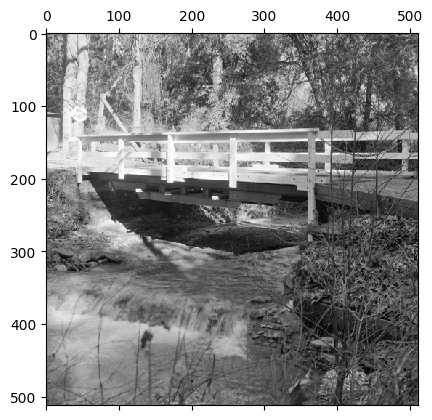

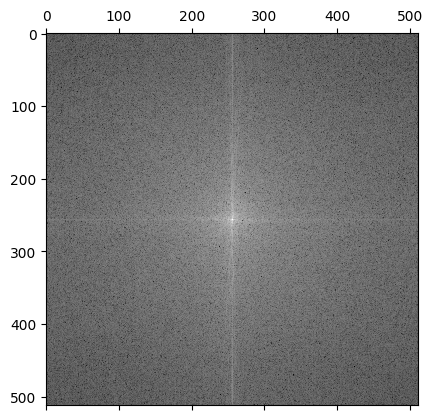

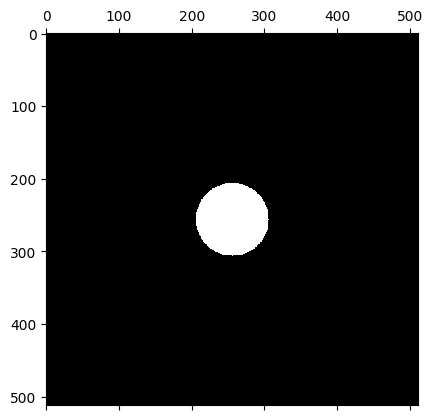

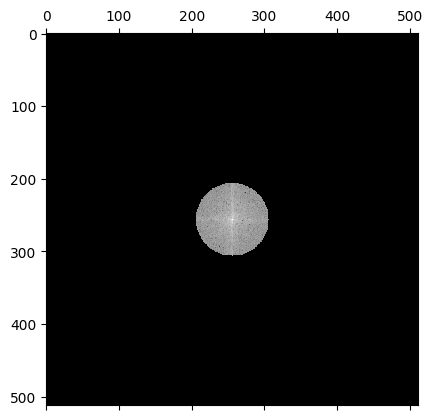

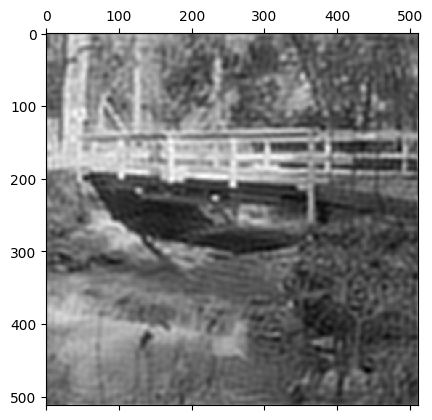

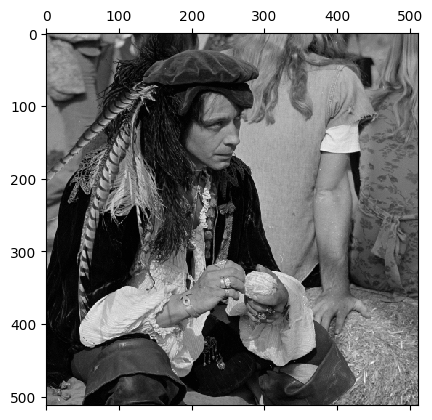

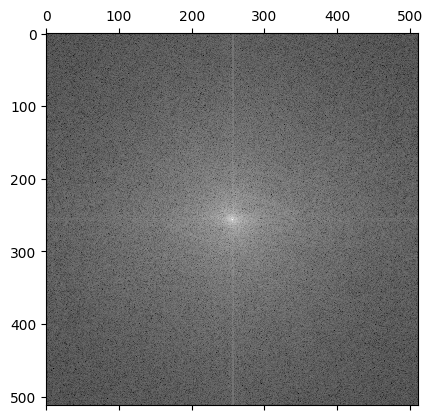

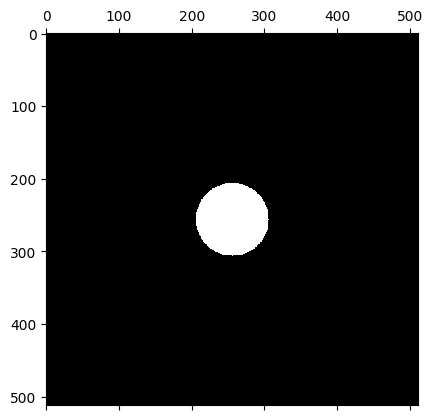

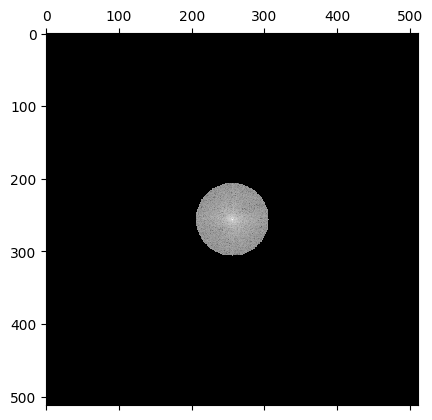

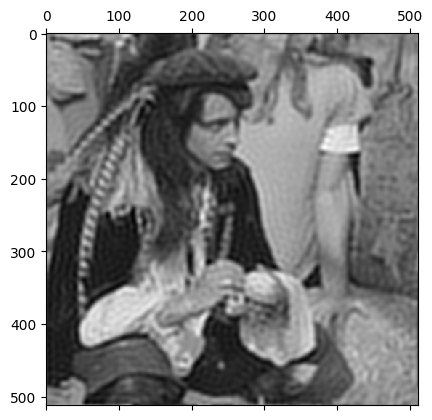

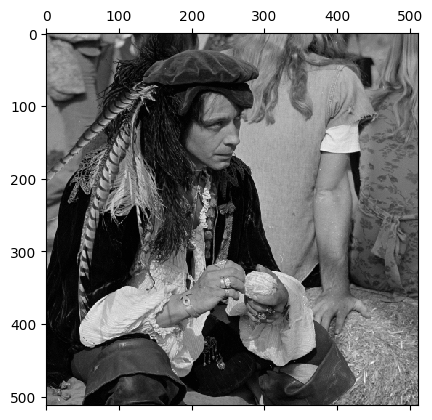

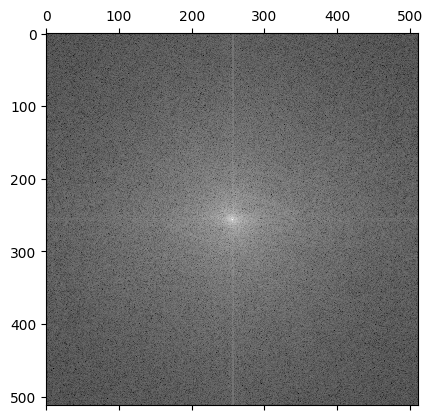

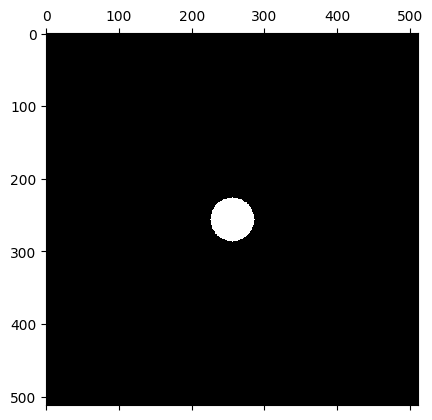

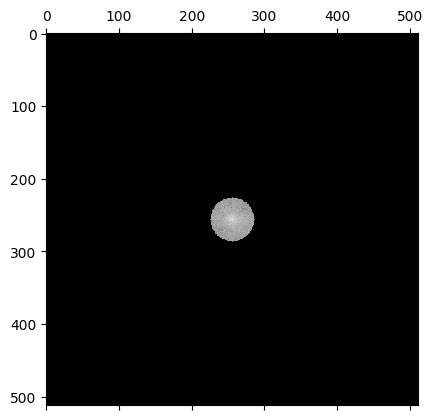

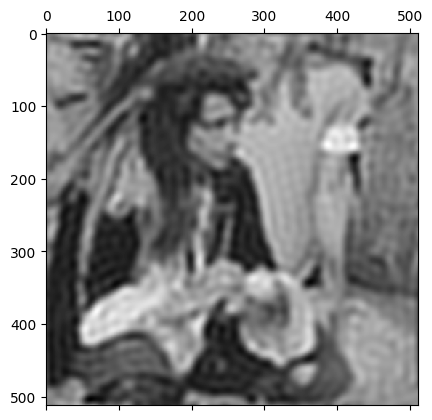

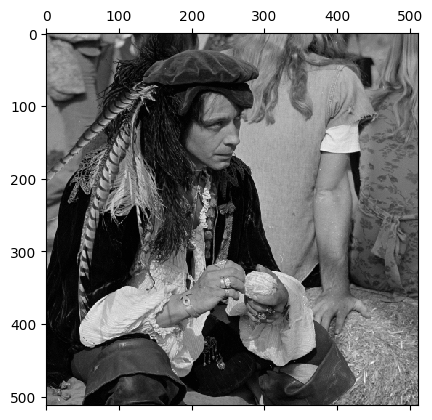

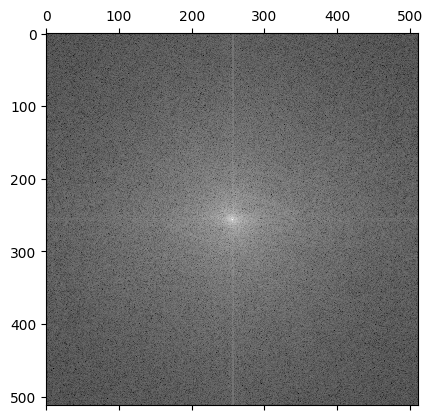

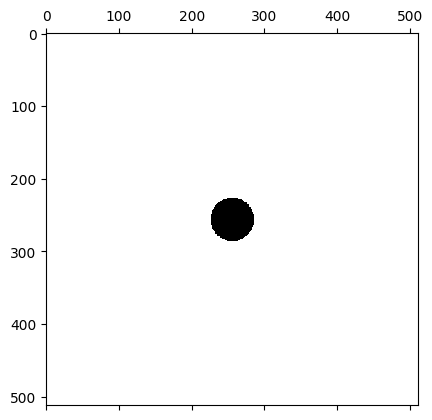

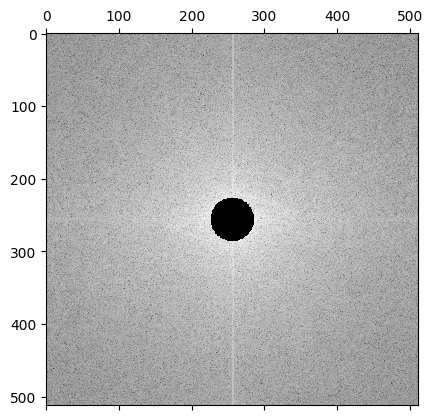

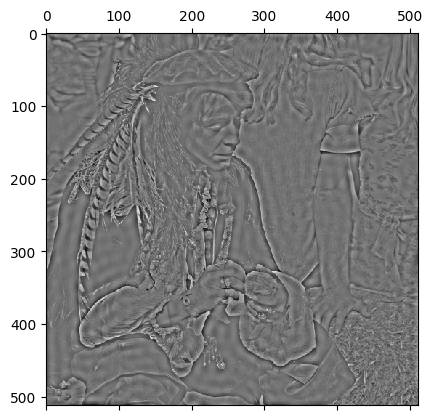

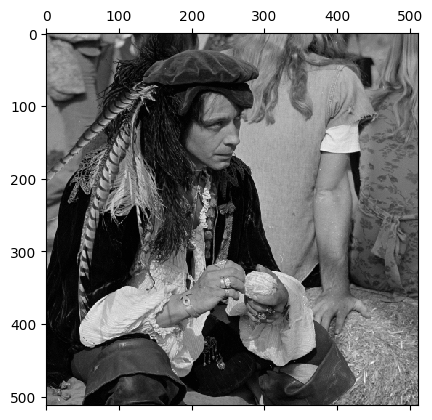

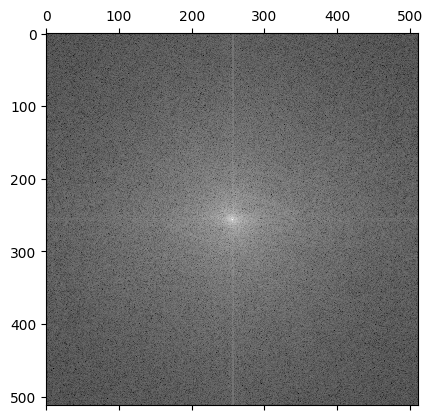

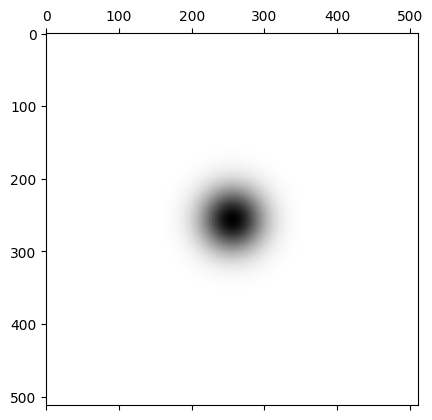

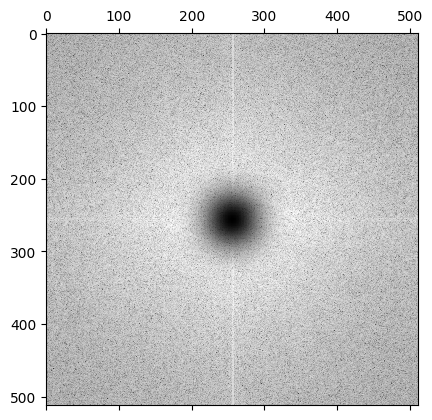

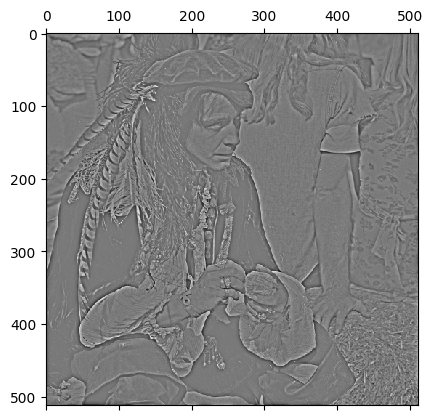

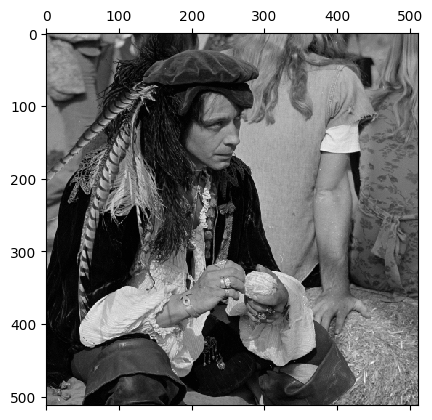

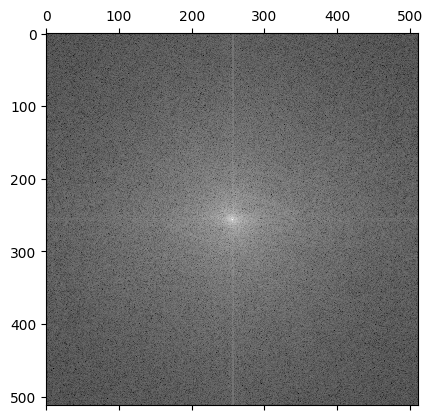

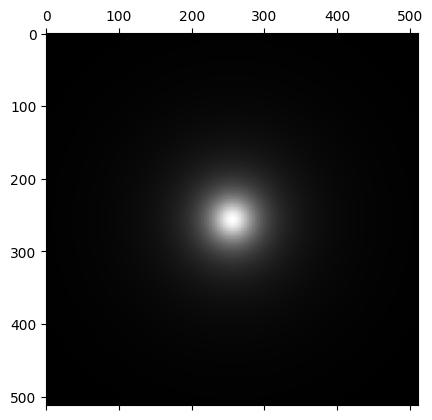

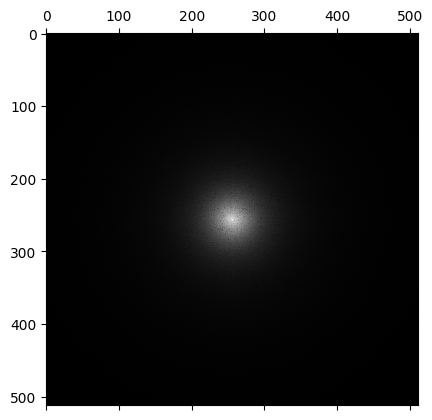

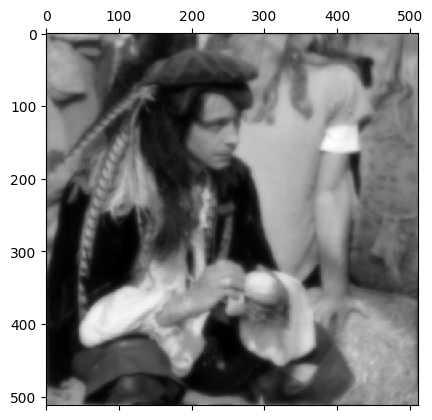

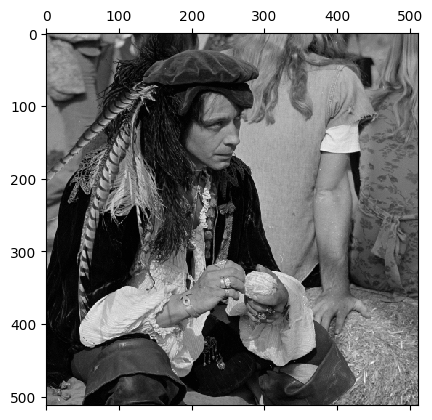

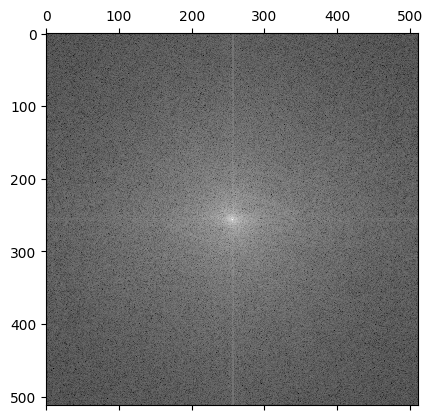

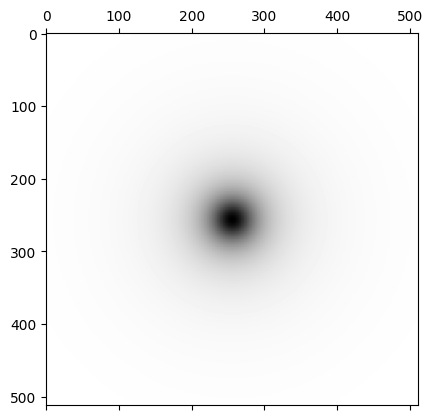

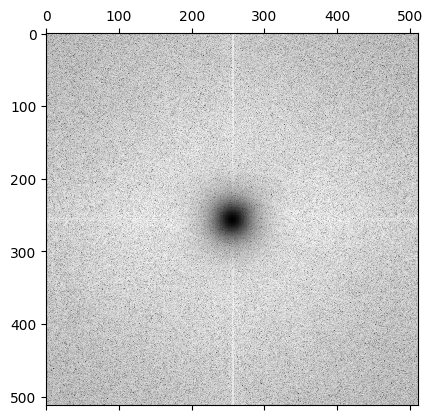

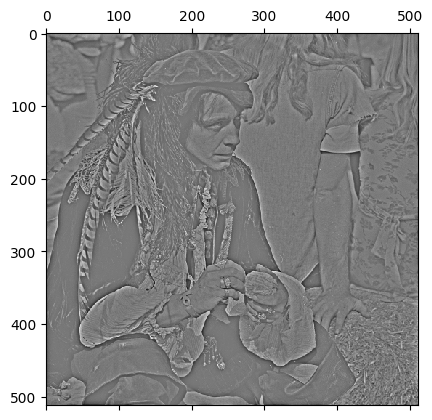

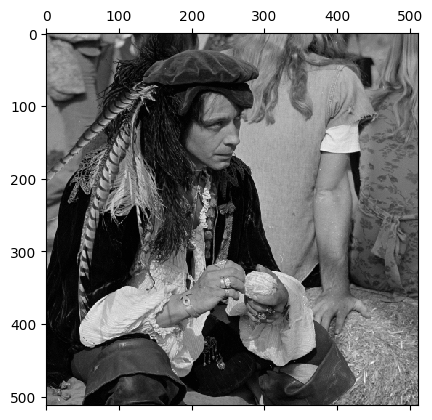

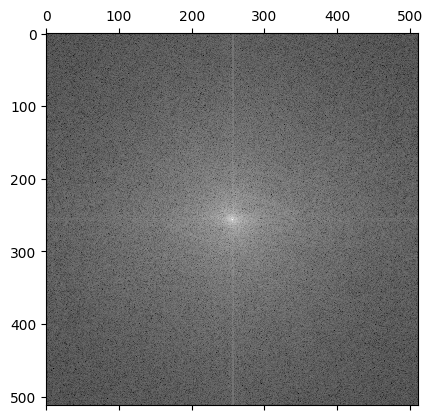

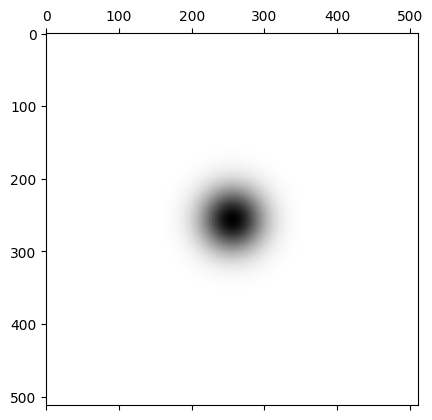

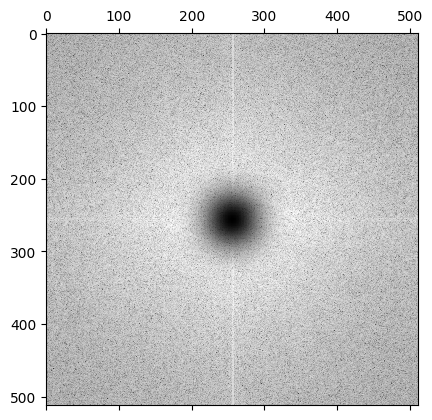

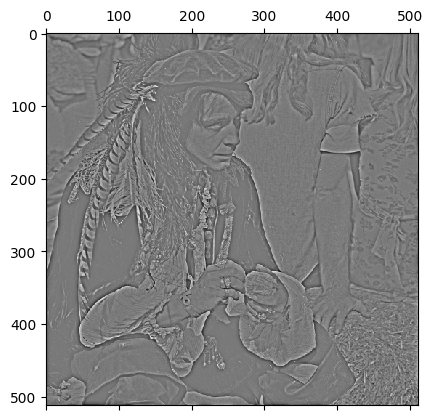

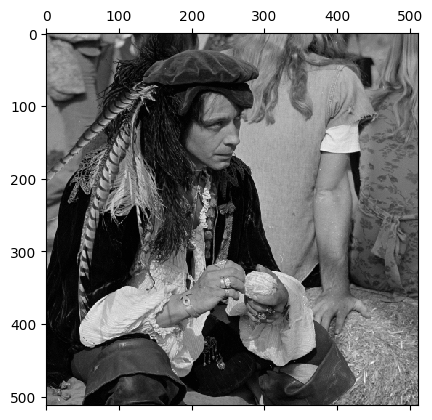

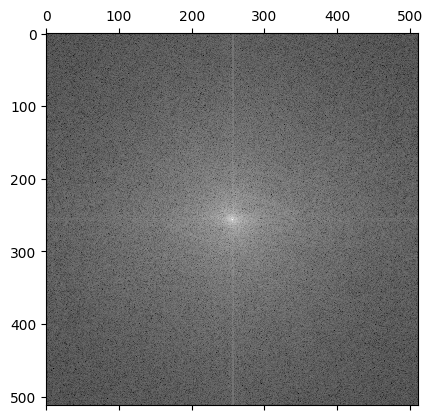

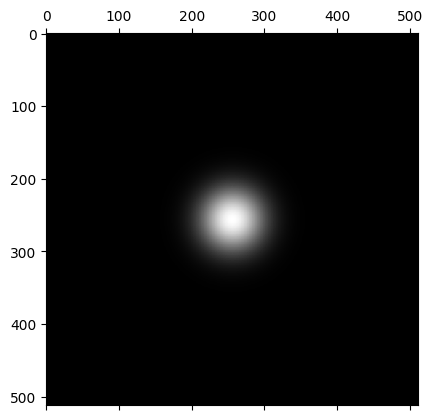

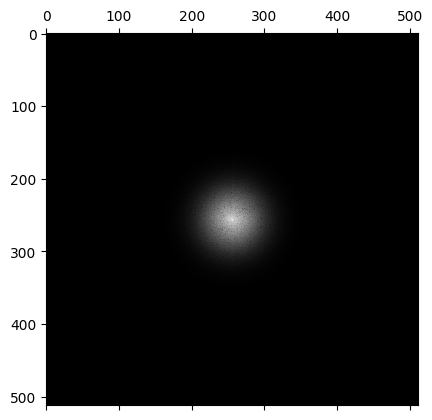

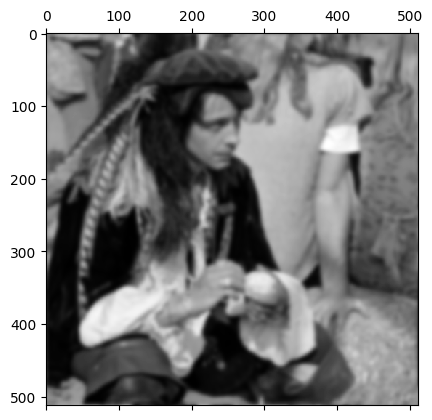

In [12]:
widgets.interact(Calc_Out,
                 img_idx = (0, len(images), 1),
                 cut_f = (0.1, 1024, 1),
                 Filter=[('Ideal LPF', (H_fun.ideal_lpf, 0)), ('Ideal HPF', (H_fun.ideal_hpf, 1)), ('Gaussian LPF', (H_fun.gaussian_lpf, 2)), ('Gaussian HPF', (H_fun.gaussian_hpf, 3)), ('Butterworth LPF', (H_fun.butterworth_lpf, 4)), ('Butterworth HPF', (H_fun.butterworth_hpf, 5))] ,
                 order = (1, 10, 1),
                 continuous_update = False)

(-0.5, 363.5, 379.5, -0.5)

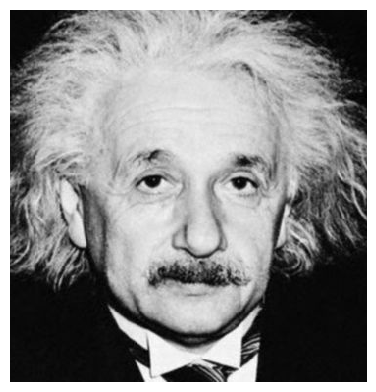

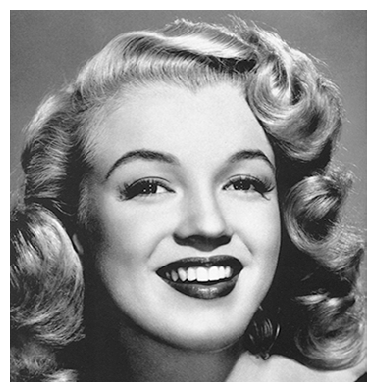

In [13]:
# Q2

# reading image
img1 = cv.imread("/content/einstein.png", cv.IMREAD_GRAYSCALE)
plt.matshow(img1, cmap='gray')
plt.axis('off')

img2 = cv.imread("/content/marilyn.png", cv.IMREAD_GRAYSCALE)
plt.matshow(img2, cmap='gray')
plt.axis('off')

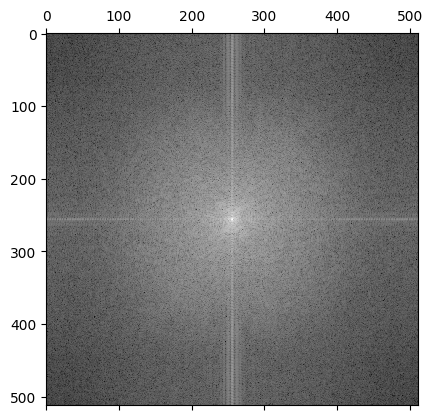

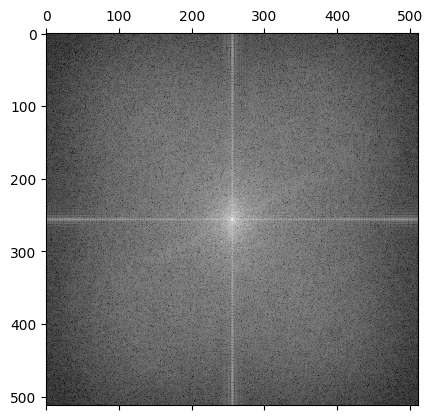

In [14]:
# fft of input image
img1_fft, m, n = fft2(img1)
img1_fft_mag = fft_mag(img1_fft)
plt.matshow(img1_fft_mag, cmap='gray')

img2_fft, m, n = fft2(img2)
img2_fft_mag = fft_mag(img2_fft)
plt.matshow(img2_fft_mag, cmap='gray')

In [15]:
N1 = img1_fft.shape[0]
N2 = img2_fft.shape[0]
D0 = 26

In [16]:
id_hpf = filter_fft(N1, H_fun.gaussian_hpf, D0)
id_lpf = filter_fft(N2, H_fun.gaussian_lpf, D0)

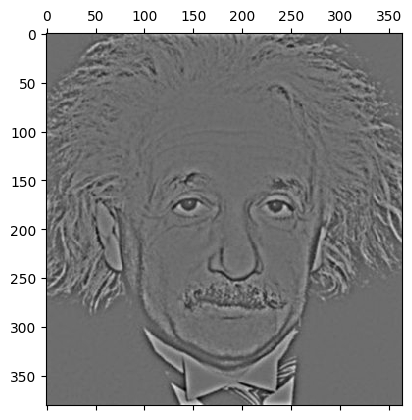

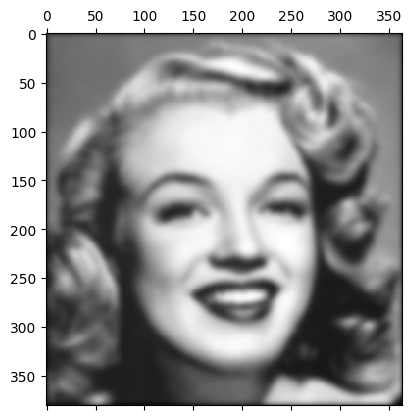

In [17]:
# Image1 Filter ideal low pass
filtered_img1_fft = img1_fft*fftshift(id_hpf)
plt.matshow(ifft2(filtered_img1_fft, m, n), cmap='gray')

# Filtered Image2 ideal High pass
filtered_img2_fft = img2_fft*fftshift(id_lpf)
plt.matshow(ifft2(filtered_img2_fft, m, n), cmap='gray')

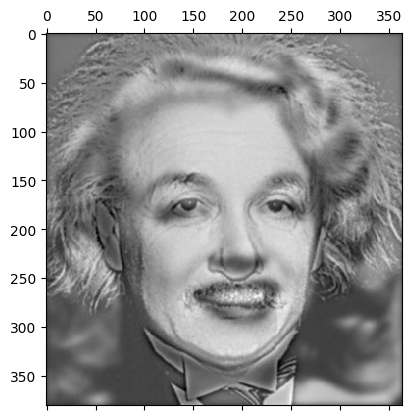

In [18]:
illusion = ifft2(filtered_img1_fft, m, n) + ifft2(filtered_img2_fft, m, n)
plt.matshow(illusion, cmap='gray')
plt.imsave(curr_dir+'/Output/Q2_Illusion_output.jpg', illusion, cmap='gray')

In [30]:
# Q3

def Ques3(path):
# reading image
  img = cv.imread(path, cv.IMREAD_GRAYSCALE)
  plt.matshow(img, cmap='gray')
  plt.axis('off')
  rows,cols = len(img),len(img[0])

  noise_fft, m, n = fft2(img)
  img_fft_mag = fft_mag(noise_fft)
  plt.matshow(img_fft_mag, cmap='gray')

  # Removing noise
  # Kernel Dimension and Threshold
  k,th = 3, 10

  # Median Filter

  MED = np.zeros((noise_fft.shape))
  for y in range(MED.shape[0]):
    for x in range(MED.shape[1]):
      l = x - k//2
      r = x + k//2
      t = y - k//2
      b = y + k//2
      l = max(0, l)
      r = min(r, n-1)
      t = max(0, t)
      b = min(b, n-1)
      window = noise_fft[t:b+1, l:r+1]
      window = window.flatten()
      MED[y, x] = np.median(abs(window))

  # Update the spectrum value if spectrum is much different than median
  for i in range(MED.shape[0]):
    for j in range(MED.shape[1]):
      if abs(i-int(MED.shape[0]/2))<=k and abs(j-int(MED.shape[1]/2))<=k:
          continue
      if abs(noise_fft[i][j])/abs(MED[i][j])>th:
            noise_fft[i][j] = MED[i][j]

  plt.matshow(ifft2(noise_fft, m, n), cmap='gray')

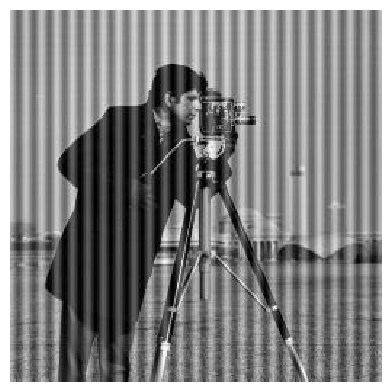

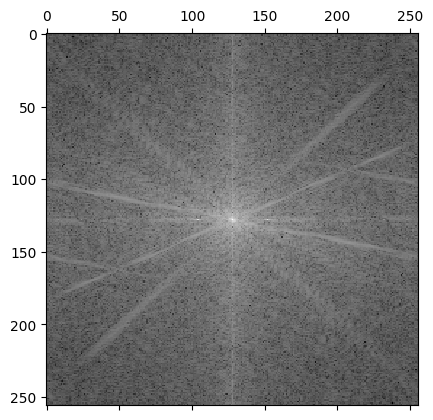

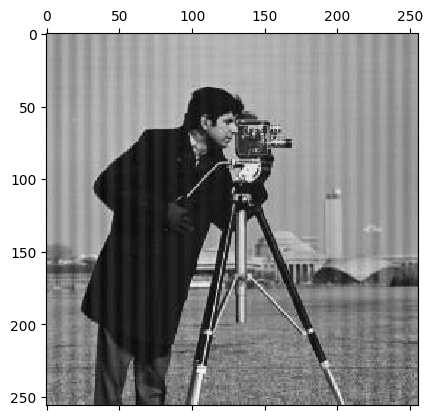

In [36]:
Ques3("/content/cameraman_noisy1.jpg")